In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('mallcustomers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


In [4]:
data = data.drop('CustomerID',axis =1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         200 non-null    object
 1   Age            200 non-null    int64 
 2   Income         200 non-null    int64 
 3   SpendingScore  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
data.describe()

,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000
mean,38.850000,60560.000000,50.200000
std,13.969007,26264.721165,25.823522
min,18.000000,15000.000000,1.000000
25%,28.750000,41500.000000,34.750000
50%,36.000000,61500.000000,50.000000
75%,49.000000,78000.000000,73.000000
max,70.000000,137000.000000,99.000000


<Axes: xlabel='Gender', ylabel='SpendingScore'>

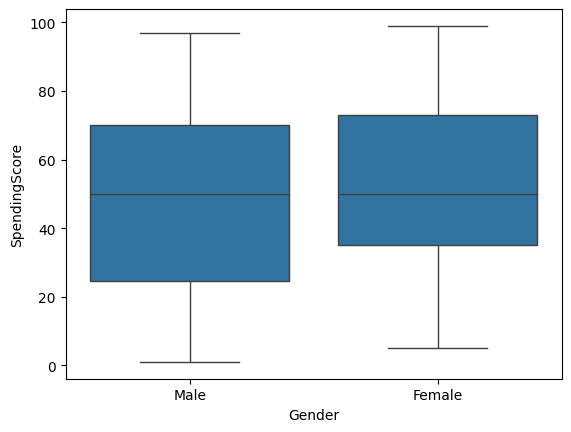

In [7]:
sns.boxplot(data = data, x='Gender',y='SpendingScore')

<Axes: xlabel='Gender', ylabel='Income'>

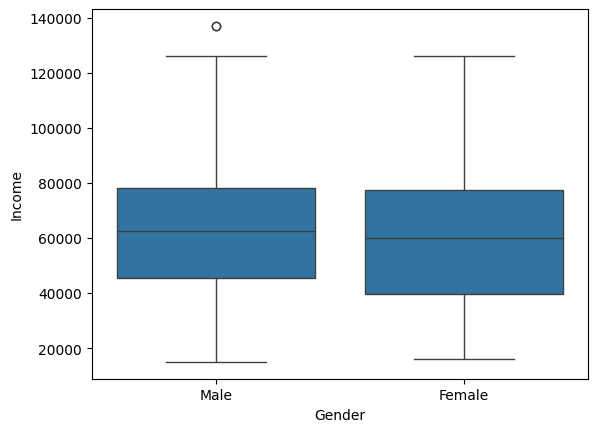

In [8]:
sns.boxplot(data = data, x='Gender',y='Income')

<Axes: xlabel='SpendingScore', ylabel='Income'>

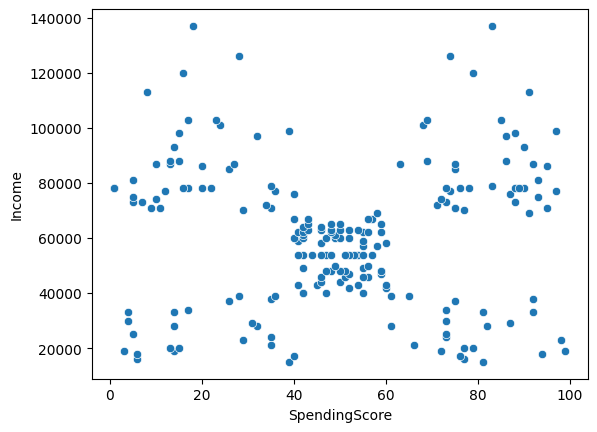

In [9]:
sns.scatterplot(data = data ,x='SpendingScore',y='Income')

<Axes: xlabel='Age', ylabel='SpendingScore'>

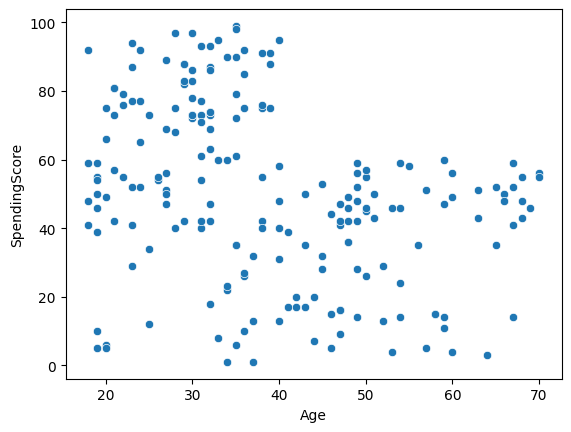

In [10]:
sns.scatterplot(data = data , x='Age',y='SpendingScore')

<Axes: xlabel='Age', ylabel='Income'>

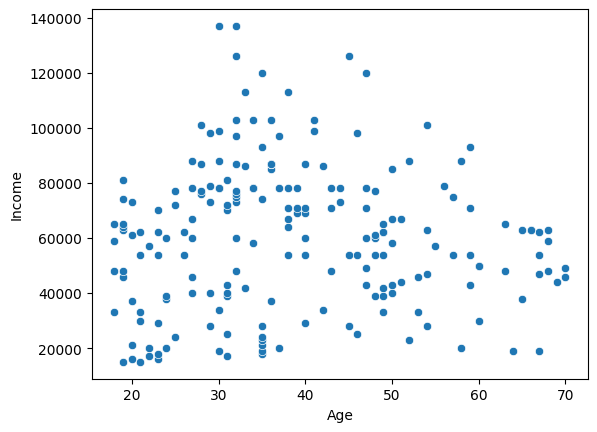

In [11]:
sns.scatterplot(data = data , x='Age',y='Income')

In [12]:
data.isnull().sum()

Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
data.columns

Index(['Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')

In [16]:
std = scaler.fit_transform(data.drop('Gender',axis=1))

In [17]:
std

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [18]:
std_data = pd.DataFrame(std)

In [19]:
std_data.head()
std_data.columns =[0,1,2]

In [20]:
data = data.drop(['Age', 'Income', 'SpendingScore'],axis=1)

In [21]:
data.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [22]:
data['Age'], data['Income'],data['SpendingScore'] = std_data[0],std_data[1],std_data[2]

In [23]:
data.head()

,Gender,Age,Income,SpendingScore
0,Male,-1.424569,-1.738999,-0.434801
1,Male,-1.281035,-1.738999,1.195704
2,Female,-1.352802,-1.700830,-1.715913
3,Female,-1.137502,-1.700830,1.040418
4,Female,-0.563369,-1.662660,-0.395980


In [43]:
data= data.drop(['Age','Gender'],axis=1)

In [25]:
from sklearn.cluster import KMeans

In [44]:
km = KMeans(n_clusters = 3,n_init = 25,random_state=1234)

In [27]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0})

In [28]:
data.isnull().sum()

Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

In [45]:
km.fit(data)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [46]:
km.inertia_

157.70400815035939

In [47]:
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [48]:
pd.Series(km.labels_).value_counts().sort_index()

0     38
1     39
2    123
Name: count, dtype: int64

In [49]:
centeroid = pd.DataFrame(km.cluster_centers_,columns = ['Income','SpendingScore'])

In [50]:
centeroid

,Income,SpendingScore
0,1.009200,-1.225535
1,0.991583,1.239503
2,-0.626190,-0.014392


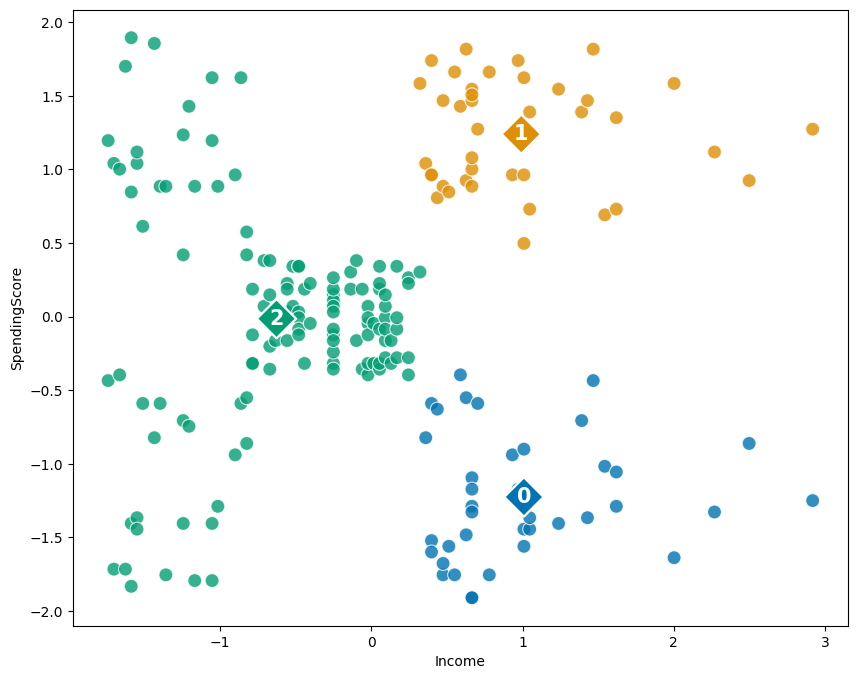

In [77]:
plt.figure(figsize=(10,8))
a=sns.scatterplot(data = data,x='Income',y='SpendingScore',palette='colorblind',
                  marker='o',hue=km.labels_,alpha=0.8,s=100,legend=False)
b=sns.scatterplot(data = centeroid,x='Income',y='SpendingScore',palette='colorblind',
                  marker='D',hue = centeroid.index,s=400,legend=False)
for i in range(len(centeroid)):
    plt.text(x=centeroid['Income'][i],y=centeroid['SpendingScore'][i],color='white',
             s=i,size=15,weight='bold',horizontalalignment='center',verticalalignment='center')
plt.show()

### Finding out the best value of K using WCSS, Avg Shiluette Score and Calinski Harbasz score

##### WCSS Method

<Axes: xlabel='None', ylabel='None'>

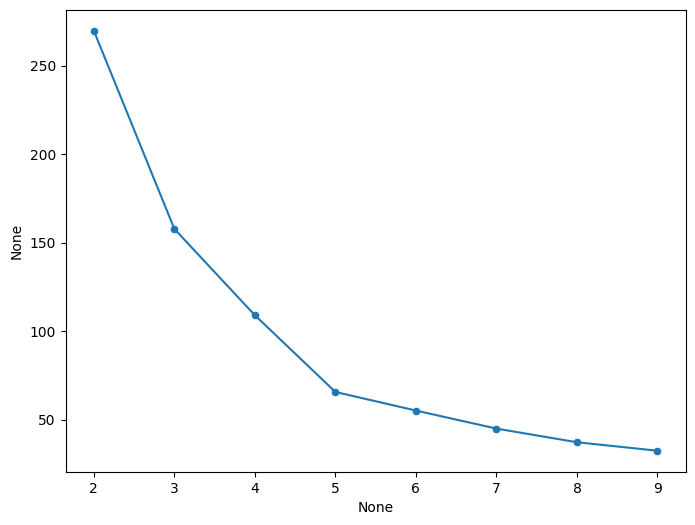

In [86]:
wcss_score = []
for i in range(2,10):
    cls = KMeans(n_clusters=i, n_init=25,random_state=42)
    km = cls.fit(data)
    wcss_score.append(km.inertia_)
plt.figure(figsize=(8,6))
wcss_score_series = pd.Series(wcss_score,index = range(2,10))
sns.lineplot(x=wcss_score_series.index,y=wcss_score_series)
sns.scatterplot(x=wcss_score_series.index,y=wcss_score_series)

##### Avg Silhouette Method

Text(0, 0.5, 'Silhouette Score')

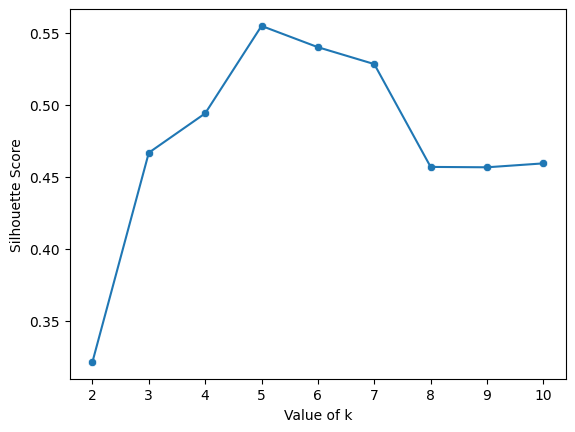

In [89]:
from sklearn.metrics import silhouette_score as si_score
s_score=[]
for i in range(2,11):
    cls = KMeans(n_clusters=i,n_init=25,random_state=42)
    km = cls.fit(data)
    s_score.append(si_score(data,km.labels_))
s_score_series = pd.Series(s_score,index=range(2,11))
sns.lineplot(x=s_score_series.index,y=s_score_series)
sns.scatterplot(x=s_score_series.index,y=s_score_series)
plt.xlabel('Value of k')
plt.ylabel('Silhouette Score')

In [ ]:
from sklearn.met